In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
# Read the dataset
df = pd.read_csv("UCI_Credit_Card.csv")
df_RAW = df.copy()
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [54]:
df[df['PAY_0'] == -2]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0
23,24,450000.0,0,1,1,40,-2,-2,-2,-2,...,560.0,0.0,0.0,19428.0,1473.0,560.0,0.0,0.0,1128.0,1
33,34,500000.0,0,2,1,54,-2,-2,-2,-2,...,7521.0,71439.0,8981.0,4152.0,22827.0,7521.0,71439.0,981.0,51582.0,0
34,35,500000.0,1,1,1,58,-2,-2,-2,-2,...,3180.0,0.0,5293.0,5006.0,31178.0,3180.0,0.0,5293.0,768.0,0
45,46,210000.0,1,1,2,29,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29946,29947,230000.0,1,1,2,44,-2,-1,-1,-1,...,1467.0,9192.0,4388.0,3306.0,806.0,1500.0,9216.0,4388.0,0.0,0
29961,29962,260000.0,1,1,2,33,-2,-2,-2,-2,...,1368.0,101.0,955.0,263.0,0.0,1368.0,101.0,955.0,0.0,0
29979,29980,180000.0,1,1,1,32,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
29983,29984,20000.0,1,2,1,44,-2,-2,-2,-2,...,2882.0,9235.0,1719.0,2890.0,2720.0,2890.0,9263.0,1824.0,1701.0,0


In [3]:
numerical = ['AGE','LIMIT_BAL','BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
bill=['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay=['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [181]:
df_RAW.shape

(30000, 25)

In [182]:
table = pd.read_html("http://inseaddataanalytics.github.io/INSEADAnalytics/CourseSessions/ClassificationProcessCreditCardDefault.html#step_3:_simple_analysis")
table[0]
table[0].to_csv("Data_Describtion.csv")

In [183]:
# Dataset Summary
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [4]:
# Change the Gender Female 2 to 0

df["SEX"].replace(2,0,inplace=True)

In [186]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,0,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,0,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,0,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,0,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [187]:
#Summary of Categorial data

credit_card_stat = pd.DataFrame(columns=['columns', 'values', 'inc_na', 'exc_na', 'missval', 'pctmissval'])
categorical = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
temp = pd.DataFrame()

for i in categorical:
    temp['columns'] = [i]
    temp['values'] = [df[i].unique()]
    temp['inc_na'] = len(df[i].unique())
    temp['exc_na'] = df[i].nunique()
    temp['missval'] = df[i].isnull().sum()
    temp['pctmissval'] = (df[i].isnull().sum()/len(df))*100
    credit_card_stat = credit_card_stat.append(temp)

credit_card_stat

,columns,values,inc_na,exc_na,missval,pctmissval
0,SEX,"[0, 1]",2,2,0,0.0
0,EDUCATION,"[2, 1, 3, 5, 4, 6, 0]",7,7,0,0.0
0,MARRIAGE,"[1, 2, 3, 0]",4,4,0,0.0
0,PAY_0,"[2, -1, 0, -2, 1, 3, 4, 8, 7, 5, 6]",11,11,0,0.0
0,PAY_2,"[2, 0, -1, -2, 3, 5, 7, 4, 1, 6, 8]",11,11,0,0.0
0,PAY_3,"[-1, 0, 2, -2, 3, 4, 6, 7, 1, 5, 8]",11,11,0,0.0
0,PAY_4,"[-1, 0, -2, 2, 3, 4, 5, 7, 6, 1, 8]",11,11,0,0.0
0,PAY_5,"[-2, 0, -1, 2, 3, 5, 4, 7, 8, 6]",10,10,0,0.0
0,PAY_6,"[-2, 2, 0, -1, 3, 6, 4, 7, 8, 5]",10,10,0,0.0


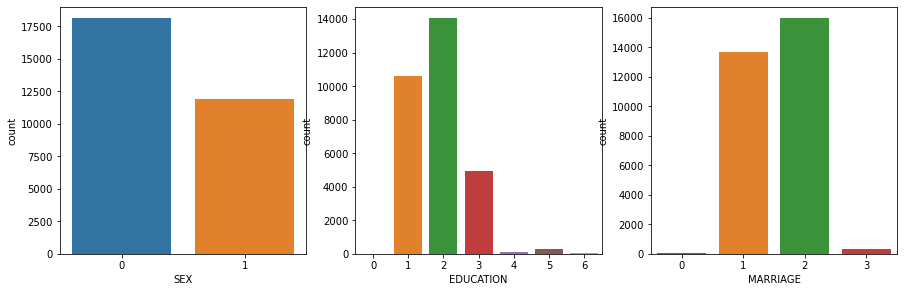

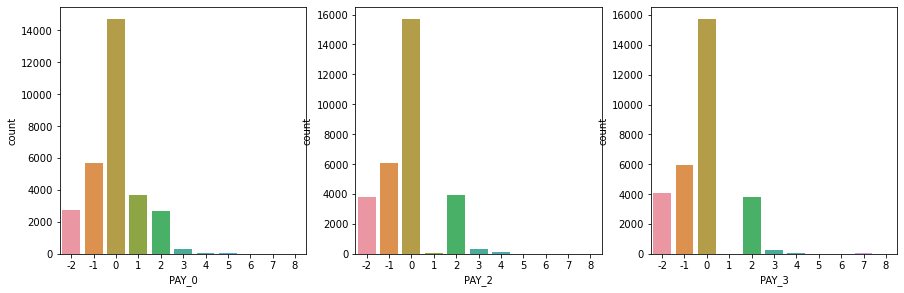

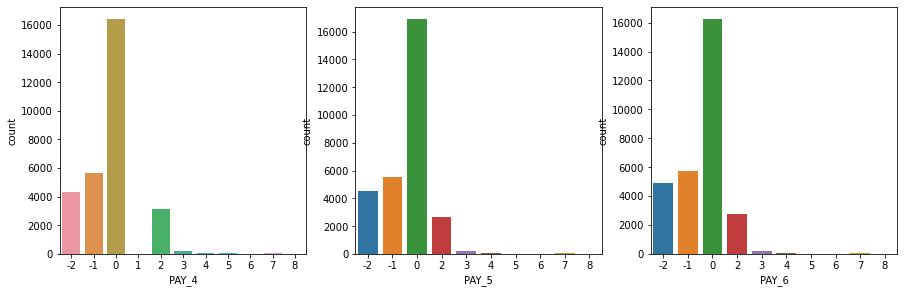

<Figure size 1080x720 with 0 Axes>

In [188]:
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(categorical):
    if ix <= 3:
        
        ax1 = fig.add_subplot(2,3,ix)
        sns.countplot(data = df, x=c, ax = ax1)
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

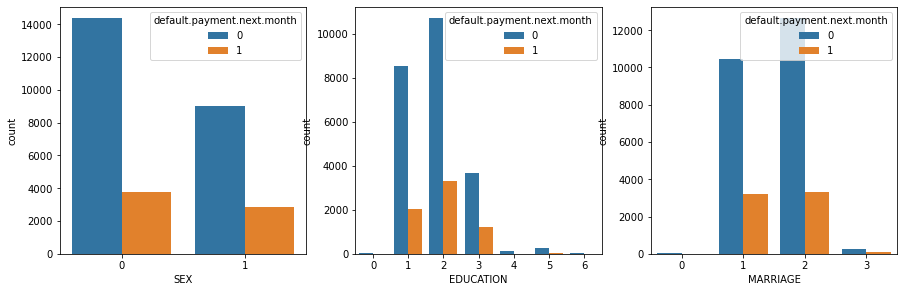

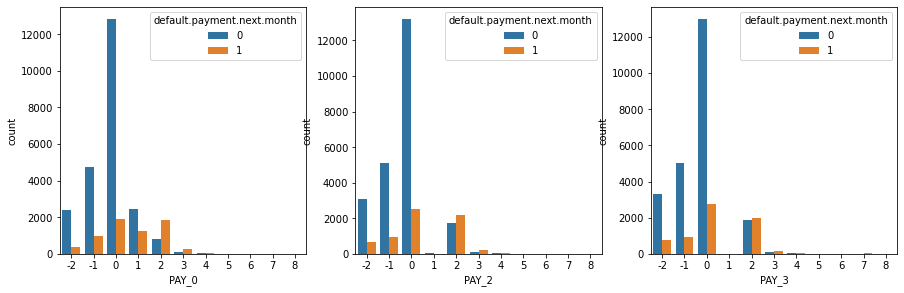

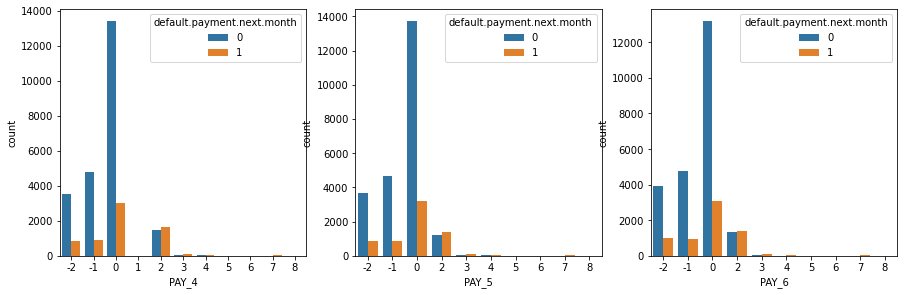

<Figure size 1080x720 with 0 Axes>

In [189]:
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(categorical):
    if ix <= 3:
        
        ax1 = fig.add_subplot(2,3,ix)
        sns.countplot(data = df, x=c, ax = ax1,hue = "default.payment.next.month")
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

## Report

1. In Education we mearge the categories 5,6,0,4 in to one category 0
2. Rearrange Education 0=unkhown+others  1= high School 2=University 3= Graduate School
3. In Marriage we mearge the categories 0 and 3 in to one category 3

## Numarical Variables

In [190]:
Numerical_summary_bill = pd.DataFrame(columns=['columns','Min','Max','MissingVals','%_MissingVals','IQR','lower','upper'])
temp = pd.DataFrame()
for i in bill:
    temp['columns'] = [i]
    temp['Min'] = df[i].min()
    temp['Max'] = df[i].max()
    temp['MissingVals'] = df[i].isnull().sum()
    temp['%_MissingVals'] = df[i].isnull().sum()/len(df)*100
    temp['IQR'] = df[i].quantile(.75) - df[i].quantile(.25)
    temp['lower'] = df[i].quantile(.25) - 1.5*temp['IQR']
    temp['upper'] = df[i].quantile(.75) + 1.5*temp['IQR']
    Numerical_summary_bill = Numerical_summary_bill.append(temp)
    
Numerical_summary_bill

,columns,Min,Max,MissingVals,%_MissingVals,IQR,lower,upper
0,BILL_AMT1,-165580.0,964511.0,0,0.0,63532.25,-91739.625,162389.375
0,BILL_AMT2,-69777.0,983931.0,0,0.0,61021.50,-88547.500,155538.500
0,BILL_AMT3,-157264.0,1664089.0,0,0.0,57498.50,-83581.500,146412.500
0,BILL_AMT4,-170000.0,891586.0,0,0.0,52179.25,-75942.125,132774.875
0,BILL_AMT5,-81334.0,927171.0,0,0.0,48427.50,-70878.250,122831.750
0,BILL_AMT6,-339603.0,961664.0,0,0.0,47942.25,-70657.375,121111.625


In [191]:
Numerical_summary_pay = pd.DataFrame(columns=['columns','Min','Max','MissingVals','%_MissingVals','IQR','lower','upper'])
temp = pd.DataFrame()
for i in pay:
    temp['columns'] = [i]
    temp['Min'] = df[i].min()
    temp['Max'] = df[i].max()
    temp['MissingVals'] = df[i].isnull().sum()
    temp['%_MissingVals'] = df[i].isnull().sum()/len(df)*100
    temp['IQR'] = df[i].quantile(.75) - df[i].quantile(.25)
    temp['lower'] = df[i].quantile(.25) - 1.5*temp['IQR']
    temp['upper'] = df[i].quantile(.75) + 1.5*temp['IQR']
    Numerical_summary_pay = Numerical_summary_pay.append(temp)
    
Numerical_summary_pay

,columns,Min,Max,MissingVals,%_MissingVals,IQR,lower,upper
0,PAY_AMT1,0.0,873552.0,0,0.0,4006.00,-5009.000,11015.000
0,PAY_AMT2,0.0,1684259.0,0,0.0,4167.00,-5417.500,11250.500
0,PAY_AMT3,0.0,896040.0,0,0.0,4115.00,-5782.500,10677.500
0,PAY_AMT4,0.0,621000.0,0,0.0,3717.25,-5279.875,9589.125
0,PAY_AMT5,0.0,426529.0,0,0.0,3779.00,-5416.000,9700.000
0,PAY_AMT6,0.0,528666.0,0,0.0,3882.25,-5705.625,9823.375


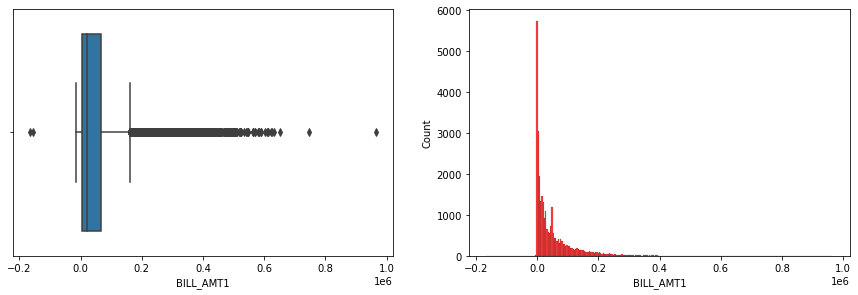

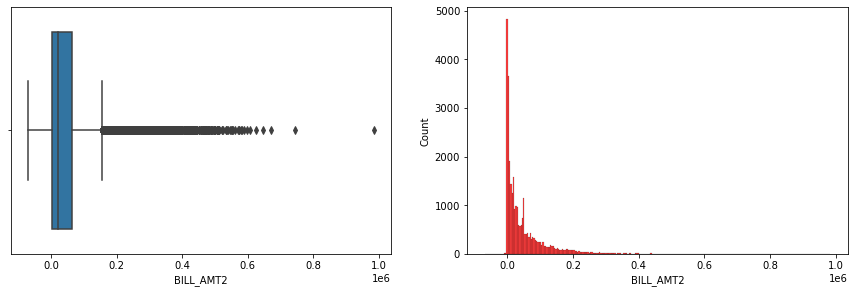

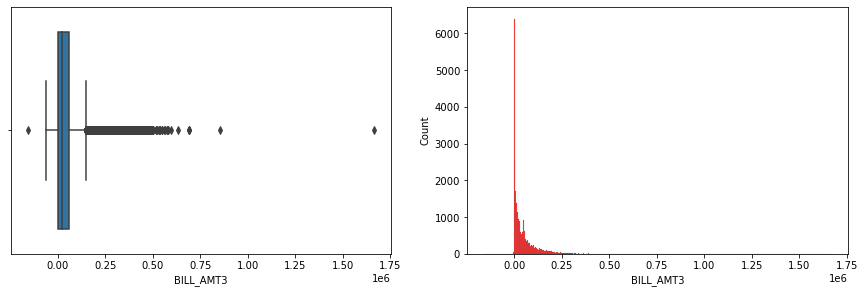

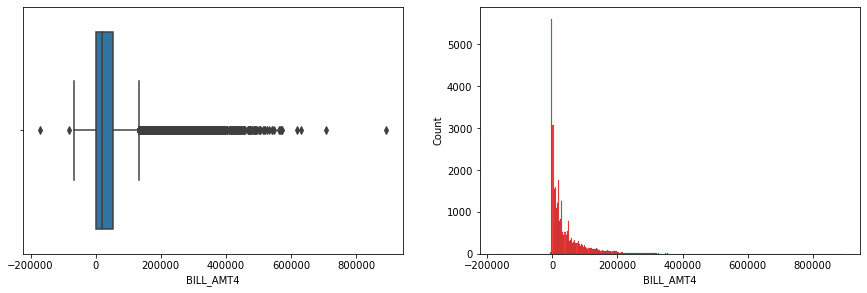

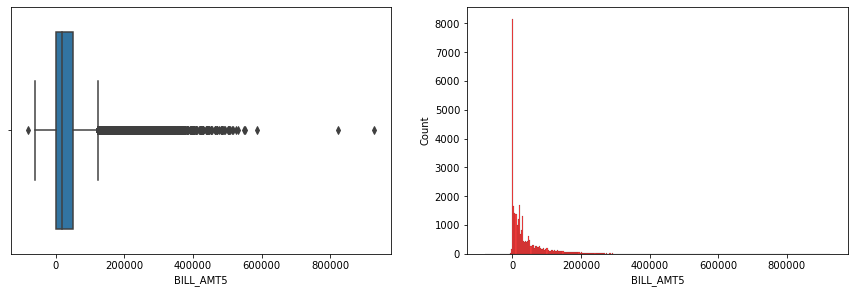

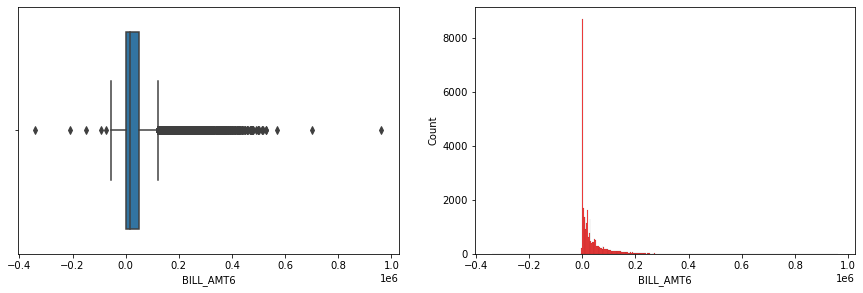

<Figure size 1080x720 with 0 Axes>

In [192]:
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(bill):
    if ix <= 2:
        ax1 = fig.add_subplot(2,2,1)
        sns.boxplot(data = df, x=c, ax = ax1)
        ax2 = fig.add_subplot(2,2,2)
        sns.histplot(data = df, x=c, ax = ax2,color="red")
    ix = 3
    if ix == 3: 
        fig = plt.figure(figsize = (15,10))
        ix =1

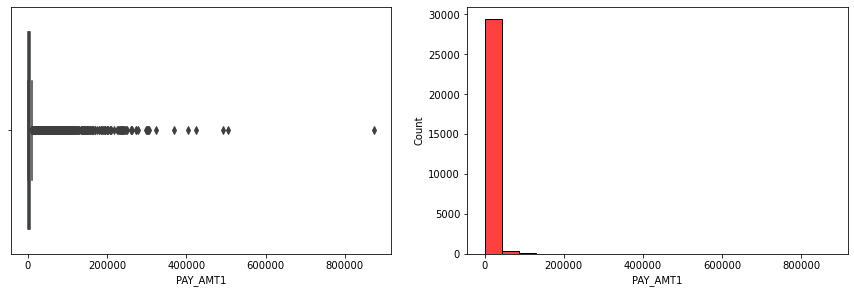

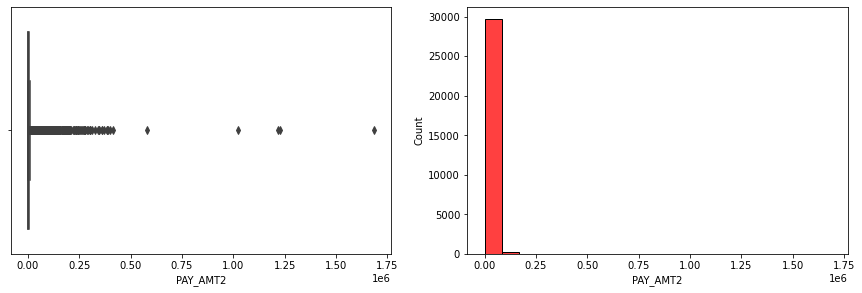

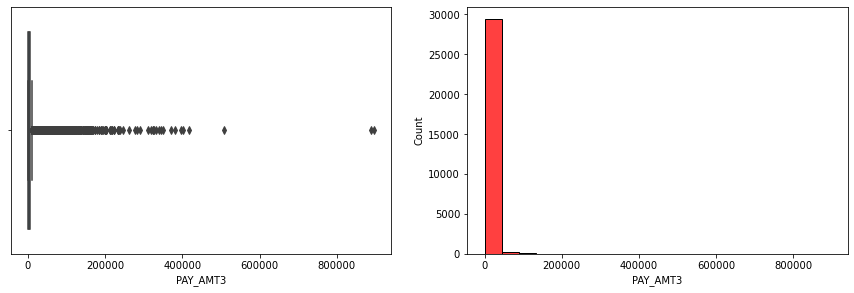

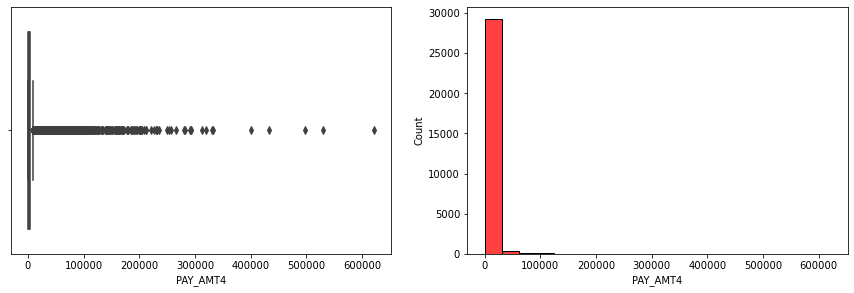

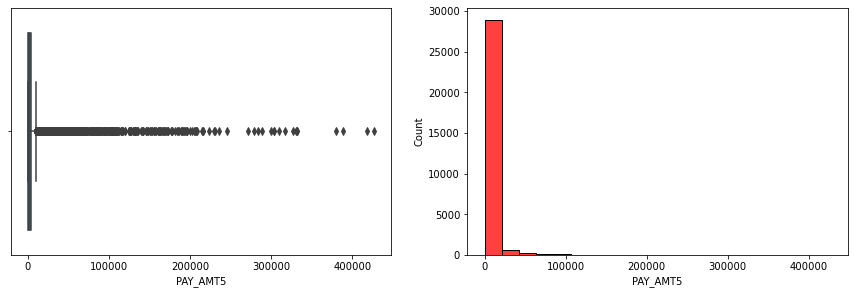

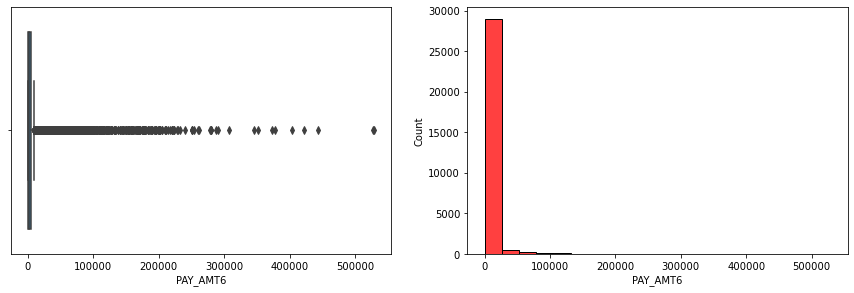

<Figure size 1080x720 with 0 Axes>

In [193]:
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(pay):
    if ix <= 2:
        ax1 = fig.add_subplot(2,2,1)
        sns.boxplot(data = df, x=c, ax = ax1)
        ax2 = fig.add_subplot(2,2,2)
        sns.histplot(data = df, x=c, ax = ax2,color="red",bins=20)
    ix = 3
    if ix == 3: 
        fig = plt.figure(figsize = (15,10))
        ix =1

## Bivariate Data Analysis

In [5]:
df1 = df.copy() 

# Cheak Point

1. In Education we mearge the categories 5,6,0 in to one category 4
2. Rearrange Education 0=unkhown+others  1= high School 2=University 3= Graduate School
3. In Marriage we mearge the categories 0 and 3 in to one category 3

In [6]:
# In Education we mearge the categories 5,6,0 in to one category 4

df1.EDUCATION = df1.EDUCATION.replace(5,4)
df1.EDUCATION = df1.EDUCATION.replace(6,4)
df1.EDUCATION = df1.EDUCATION.replace(0,4)

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EDUCATION', ylabel='count'>

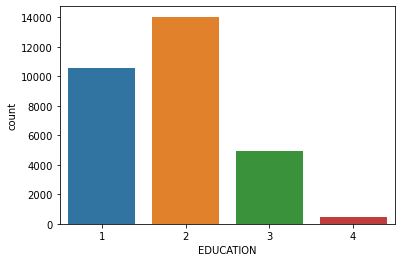

In [196]:
sns.countplot(df1.EDUCATION)

In [7]:
# In Marriage we mearge the categories 0 and 3 in to one category 3

df1.MARRIAGE = df1.MARRIAGE.replace(0,3)

In [7]:
df2 = df1.copy()

# Cheak Point

# Transformation

In [8]:
df2.drop(["ID",'MARRIAGE'],axis = 1,inplace = True)

In [9]:
df2.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [10]:
X_multi = df2[['LIMIT_BAL', 'SEX', 'EDUCATION', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]

Y_multi = df2[['default.payment.next.month']]

In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X_multi,Y_multi,test_size=0.3,random_state = 0)

In [12]:
# Handeling Imblansed data with Over Sampling

from collections import Counter
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
os = RandomOverSampler()
X_train_ns, Y_train_ns = os.fit_resample(X_train, Y_train)
print(X_train_ns.value_counts())
print(Y_train_ns.value_counts())

LIMIT_BAL  SEX  EDUCATION  AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6
20000.0    1    2          24    2      2      4      4      4      4      1650.0     1650.0     1650.0     1650.0    1650.0     1650.0     0.0       0.0       0.0       0.0       0.0       0.0         12
360000.0   1    1          38   -2     -2     -2     -2     -2     -2      0.0        0.0        0.0        0.0       0.0        0.0        0.0       0.0       0.0       0.0       0.0       0.0         10
240000.0   0    3          35    0      0      0      0      0      0      238166.0   236686.0   186613.0   189470.0  119525.0   121178.0   8522.0    9100.0    8244.0    5000.0    5000.0    4011.0      10
230000.0   0    1          36   -1     -1      2     -1     -1     -1      878.0      9567.0     3074.0     3660.0    3790.0     6006.0     9574.0    0.0       3660.0    3790.0    6006.0

In [28]:
from sklearn.metrics import confusion_matrix

### Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=5, random_state=0)

In [17]:
clf.fit(X_train_ns, Y_train_ns)

<ipython-input-17-858b60db0230>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train_ns, Y_train_ns)


RandomForestClassifier(max_depth=5, random_state=0)

In [18]:
y_pred_RF = clf.predict(X_test)

In [208]:
#Random Oversampler
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      7060
           1       0.50      0.59      0.54      1940

    accuracy                           0.78      9000
   macro avg       0.69      0.71      0.70      9000
weighted avg       0.80      0.78      0.79      9000



In [19]:
#Smote
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      7060
           1       0.47      0.55      0.51      1940

    accuracy                           0.77      9000
   macro avg       0.67      0.69      0.68      9000
weighted avg       0.78      0.77      0.78      9000



In [209]:
confusion_matrix(Y_test, y_pred_RF)

array([[5910, 1150],
       [ 802, 1138]], dtype=int64)

In [29]:
X_train_scale = X_train_ns.copy()

In [32]:
clf = RandomForestClassifier(n_estimators=115, min_samples_split=6,min_samples_leaf=3,max_features='auto',max_depth=18)
clf.fit(X_train_ns, Y_train_ns)

<ipython-input-32-6930d01d84dd>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train_ns, Y_train_ns)


RandomForestClassifier(max_depth=18, min_samples_leaf=3, min_samples_split=6,
                       n_estimators=115)

In [20]:
#colab
clf = RandomForestClassifier(criterion='entropy',n_estimators=90, min_samples_split=4,min_samples_leaf=1,max_features='auto',max_depth=18)
clf.fit(X_train_ns, Y_train_ns)

<ipython-input-20-8f902beb871c>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train_ns, Y_train_ns)


RandomForestClassifier(criterion='entropy', max_depth=18, min_samples_split=4,
                       n_estimators=90)

In [ ]:
{'criterion': 'gini',
 'max_depth': 18,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 90}

In [40]:
max(clf.predict_proba(X_test)[0])

0.6714171395333052

In [34]:
y_pred_RF = clf.predict(X_test)

In [22]:
#colab
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      7060
           1       0.55      0.51      0.53      1940

    accuracy                           0.80      9000
   macro avg       0.71      0.70      0.70      9000
weighted avg       0.80      0.80      0.80      9000



In [23]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, y_pred_RF)

0.6962625215385064

In [35]:
#Random
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      7060
           1       0.54      0.52      0.53      1940

    accuracy                           0.80      9000
   macro avg       0.71      0.70      0.70      9000
weighted avg       0.80      0.80      0.80      9000



In [36]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, y_pred_RF)

0.6984484974153792

In [17]:
#SMote
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      7060
           1       0.49      0.50      0.49      1940

    accuracy                           0.78      9000
   macro avg       0.68      0.68      0.68      9000
weighted avg       0.78      0.78      0.78      9000



In [18]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, y_pred_RF)

0.6767172395666015

In [28]:
#ADASYN
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      7060
           1       0.49      0.50      0.49      1940

    accuracy                           0.78      9000
   macro avg       0.67      0.68      0.68      9000
weighted avg       0.78      0.78      0.78      9000



In [29]:
confusion_matrix(Y_test, y_pred_RF)

array([[6042, 1018],
       [ 971,  969]], dtype=int64)

# Standarization

In [30]:
from sklearn.preprocessing import StandardScaler
pt = StandardScaler()

X_train_scale[numerical]=pt.fit_transform(X_train_scale[numerical])

In [31]:
X_test[numerical] = pt.transform(X_test[numerical])

<ipython-input-31-2a4994983c98>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[numerical] = pt.transform(X_test[numerical])
C:\Users\bijoy\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [17]:
X_train_scale

,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-0.988534,0,2,-0.483866,-2,-2,-2,-2,-2,-2,...,-0.673717,-0.670807,-0.661895,-0.654612,-0.333992,-0.246308,-0.298163,-0.304798,-0.301635,-0.284236
1,0.365981,1,2,-0.483866,1,2,2,0,0,0,...,-0.250339,-0.229744,-0.187015,-0.175661,-0.124574,-0.246014,-0.232141,-0.231375,-0.208445,-0.159679
2,2.756301,0,4,0.261474,-2,-2,-2,-2,-2,-2,...,-0.315966,-0.034718,-0.509094,-0.508855,-0.176877,0.977205,2.421775,1.889631,0.316904,-0.064269
3,-1.068212,0,2,-1.442160,0,0,0,0,0,0,...,-0.107323,-0.356802,-0.338198,-0.319214,-0.243954,-0.152524,-0.187172,0.050932,-0.251626,-0.235970
4,-0.829180,0,2,1.326246,1,2,0,0,0,0,...,-0.386655,-0.367402,-0.350284,-0.328707,-0.333992,-0.148054,-0.198231,-0.233652,-0.159361,-0.221957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32603,1.640818,0,1,0.367952,-1,-1,-2,-2,-1,-1,...,-0.673717,-0.670807,-0.646937,-0.654612,-0.333992,-0.246308,-0.298163,-0.240340,-0.301635,-0.013885
32604,-0.032406,1,1,-0.057957,0,0,0,0,0,0,...,1.207714,0.942667,0.237030,0.135582,0.089144,0.004241,-0.018355,-0.169621,-0.187816,-0.190818
32605,-0.988534,1,1,-0.377389,0,0,2,0,0,0,...,-0.238171,-0.203628,-0.172354,-0.628235,-0.095787,-0.246308,-0.258390,-0.262608,-0.299430,-0.284236
32606,-0.590148,1,2,-0.909774,1,2,-1,-1,-1,-1,...,-0.634616,-0.647995,-0.645550,-0.598120,-0.333853,-0.113468,-0.200830,-0.234150,-0.062187,0.027903


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
random_param = {
    "n_neighbors" : [3,4,5,6,7],
    'leaf_size' : [30,40,20,50,45],
}


In [ ]:
random_search = RandomizedSearchCV(n_iter=50,estimator=knn_clf,param_distributions=random_param,cv=5,n_jobs =-1,verbose = 3)
random_search.fit(X_train_scale, Y_train_ns)

### KNN Classifier

In [41]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(X_train_scale, Y_train_ns)

C:\Users\bijoy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

In [42]:
y_pred = neigh.predict(X_test)

In [36]:
#anasyn
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      7060
           1       0.39      0.43      0.41      1940

    accuracy                           0.73      9000
   macro avg       0.62      0.62      0.62      9000
weighted avg       0.74      0.73      0.74      9000



In [43]:
#smote
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83      7060
           1       0.39      0.41      0.40      1940

    accuracy                           0.73      9000
   macro avg       0.61      0.61      0.61      9000
weighted avg       0.74      0.73      0.74      9000



### SVC

In [32]:
from sklearn.svm import SVC
svc_clf = SVC()
svc_clf.fit(X_train_scale, Y_train_ns)

C:\Users\bijoy\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC()

In [33]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(svc_clf, X_train_scale, Y_train_ns, scoring="roc_auc", cv = 5)
print(cv_score.mean())

C:\Users\bijoy\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\bijoy\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\bijoy\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\bijoy\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

0.7801868356908443


In [25]:
y_pred_SVC = svc_clf.predict(X_test)

In [22]:
y_pred_SVC[0]

1

In [29]:

print(classification_report(Y_test, y_pred_SVC))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      7060
           1       0.50      0.57      0.53      1940

    accuracy                           0.79      9000
   macro avg       0.69      0.71      0.70      9000
weighted avg       0.80      0.79      0.79      9000



In [30]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, y_pred_SVC)

0.7054656698110453

In [26]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred_SVC))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      7060
           1       0.50      0.56      0.53      1940

    accuracy                           0.78      9000
   macro avg       0.69      0.70      0.69      9000
weighted avg       0.79      0.78      0.79      9000



In [27]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, y_pred_SVC)

0.7025853508951257

In [29]:
confusion_matrix(Y_test, y_pred_SVC)

array([[5923, 1137],
       [ 829, 1111]], dtype=int64)

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train_ns, Y_train_ns)

C:\Users\bijoy\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoostingClassifier()

In [14]:
y_predGB = gbc.predict(X_test)

In [37]:
gbc.predict_proba(X_test)

array([[0.20463512, 0.79536488],
       [0.21081104, 0.78918896],
       [0.28069598, 0.71930402],
       ...,
       [0.27507572, 0.72492428],
       [0.39106416, 0.60893584],
       [0.29641174, 0.70358826]])

In [15]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_predGB))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84      7060
           1       0.47      0.62      0.53      1940

    accuracy                           0.77      9000
   macro avg       0.68      0.71      0.69      9000
weighted avg       0.79      0.77      0.78      9000



In [16]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, y_predGB)

0.7124653193539908

In [21]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(gbc, X_train_ns, Y_train_ns, scoring="roc_auc", cv = 10)
print(cv_score.mean())

C:\Users\bijoy\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\bijoy\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\bijoy\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\bijoy\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

0.7993548576789715


In [36]:
with open('GradientBoostingClassifier.sav','wb') as f:
    pickle.dump(gbc,f)

In [17]:
param = {
    "loss":["deviance","exponential"],
    "learning_rate": [0.1,0.01,1],
    "n_estimators": [90, 100, 110, 120],
    "criterion": ["friedman_mse"],
    "max_depth": [3, 5, 10],
    "max_features": ["auto", "sqrt","log2"]
}

In [3]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(n_iter=100,estimator=gbc,param_distributions=param,cv=5,n_jobs =-1,verbose = 3)
tunedgbc = random_search.fit(X_train_ns, Y_train_ns)

NameError: name 'gbc' is not defined

In [ ]:
#Tried performing RandomSearchcv and it is taking like forever i sat there for 6 hour straight still didn't get aby result
#only it worked for randomforest took like 2 hour